In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression,Lasso, Ridge,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
df = pd.read_csv('student.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
X= df.drop('math score', axis=1)
y = df['math score']

In [5]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,male,group A,high school,standard,completed,67,63
1,female,group D,some high school,free/reduced,none,59,55
2,male,group E,some college,free/reduced,none,60,50
3,male,group B,high school,standard,none,78,68
4,male,group E,associate's degree,standard,completed,73,68


In [10]:
print("Categories in 'gender' variables:   ",end='')
print(df['gender'].unique())

print("Categories in 'ethnicity' variables:   ",end='')
print(df['race/ethnicity'].unique())

print("Categories in 'parental education level' variables:   ",end='')
print(df['parental level of education'].unique())

print("Categories in 'lunch' variables:   ",end='')
print(df['lunch'].unique())

print("Categories in 'test preparation course' variables:   ",end='')
print(df['test preparation course'].unique())

Categories in 'gender' variables:   ['male' 'female']
Categories in 'ethnicity' variables:   ['group A' 'group D' 'group E' 'group B' 'group C']
Categories in 'parental education level' variables:   ['high school' 'some high school' 'some college' "associate's degree"
 "bachelor's degree" "master's degree"]
Categories in 'lunch' variables:   ['standard' 'free/reduced']
Categories in 'test preparation course' variables:   ['completed' 'none']


In [11]:
##Create column transfer function to encode categorical variables
numeric_features = X.select_dtypes(exclude=['object']).columns
categorical_features = X.select_dtypes(include=['object']).columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScaler', numeric_transformer, numeric_features),
        ('OneHotEncoder', oh_transformer, categorical_features)
    ])


In [14]:
X = preprocessor.fit_transform(X)

In [15]:
X

array([[-0.13591401, -0.30385073,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.67902695, -0.81689543,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.61113783, -1.13754838,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-2.30836575, -1.71472367,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.33930981,  0.91463045,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.61113783, -0.36798132,  0.        , ...,  1.        ,
         1.        ,  0.        ]])

In [16]:
X.shape

(1000, 19)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 19), (800,), (200, 19), (200,))

In [34]:
##Creae Evaluation function to evaluate the performance of the model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [35]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(), 
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=False)
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred) 
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print('MAE:{:.4f} '.format(model_train_mae))
    print('RMSE:{:.4f} '.format(model_train_rmse))
    print('R2 Score:{:.4f} '.format(model_train_r2))



    print('Model performance for testing set')
    print('MAE:{:.4f} '.format(model_test_mae))
    print('RMSE:{:.4f} '.format(model_test_rmse))   
    print('R2 Score:{:.4f} '.format(model_test_r2))

    r2_list.append(model_test_r2)

    print('='*30)
    print('\n')
    print('--------------------------------------------------')

Linear Regression
Model performance for training set
MAE:4.4441 
RMSE:5.5329 
R2 Score:0.8712 
Model performance for testing set
MAE:4.5618 
RMSE:5.5029 
R2 Score:0.8706 


--------------------------------------------------
Lasso Regression
Model performance for training set
MAE:5.4228 
RMSE:6.8168 
R2 Score:0.8044 
Model performance for testing set
MAE:5.3352 
RMSE:6.8049 
R2 Score:0.8022 


--------------------------------------------------
Ridge Regression
Model performance for training set
MAE:4.4431 
RMSE:5.5331 
R2 Score:0.8711 
Model performance for testing set
MAE:4.5654 
RMSE:5.5058 
R2 Score:0.8705 


--------------------------------------------------
Decision Tree
Model performance for training set
MAE:0.0013 
RMSE:0.0250 
R2 Score:1.0000 
Model performance for testing set
MAE:6.6850 
RMSE:8.4932 
R2 Score:0.6918 


--------------------------------------------------
Random Forest
Model performance for training set
MAE:1.8875 
RMSE:2.3964 
R2 Score:0.9758 
Model performance f

In [36]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
0,Linear Regression,0.870623
2,Ridge Regression,0.870487
9,CatBoost,0.855096
4,Random Forest,0.842660
8,XGBoost,0.832525
7,AdaBoost,0.821961
5,Support Vector Machine,0.819368
6,K-Nearest Neighbors,0.811284
1,Lasso Regression,0.802158
3,Decision Tree,0.691807


Text(0, 0.5, 'Predicted Values')

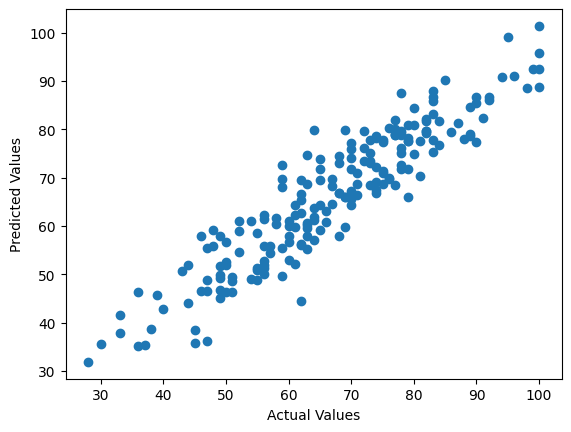

In [37]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0.5, 0, 'Actual Values')

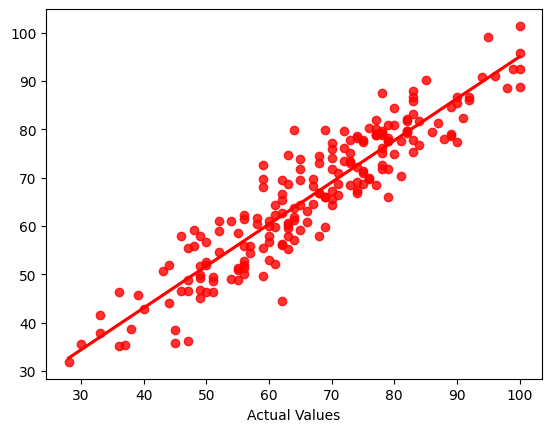

In [40]:
sns.regplot(x=y_test, y=y_test_pred, ci=None, color='red')
plt.xlabel('Actual Values')

In [41]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred,'Difference': y_test - y_test_pred})
pred_df.head()


,Actual,Predicted,Difference
521,65,71.732748,-6.732748
737,83,87.839655,-4.839655
740,52,59.068125,-7.068125
660,90,77.356071,12.643929
411,62,62.783485,-0.783485
